In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

from pathlib import Path

2023-03-05 20:06:46.509252: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 20:06:46.627687: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-05 20:06:46.986520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/maxpow/miniconda3/envs/tf/lib/:/home/maxpow/miniconda3/envs/tf/lib/
2023-03-05 20:06:46.986577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_pl

In [2]:
data_dir = Path('data')
train_path = 'data/train.csv'

In [3]:
df_train = pd.read_csv(train_path)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [4]:
signs = list(df_train.sign.unique())
signs.sort()
# signs

# Animation

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

dir = 'data'
train = pd.read_csv(f'{dir}/train.csv')

In [6]:
def get_hand_points(hand):
    x = [[hand[0][0], hand[1][0], hand[2][0], hand[3][0], hand[4][0]], # Thumb
         [hand[5][0], hand[6][0], hand[7][0], hand[8][0]], # Index
         [hand[9][0], hand[10][0], hand[11][0], hand[12][0]], 
         [hand[13][0], hand[14][0], hand[15][0], hand[16][0]], 
         [hand[17][0], hand[18][0], hand[19][0], hand[20][0]], 
         [hand[0][0], hand[5][0], hand[9][0], hand[13][0], hand[17][0], hand[0][0]]]

    y = [[hand[0][1], hand[1][1], hand[2][1], hand[3][1], hand[4][1]],  #Thumb
         [hand[5][1], hand[6][1], hand[7][1], hand[8][1]], # Index
         [hand[9][1], hand[10][1], hand[11][1], hand[12][1]], 
         [hand[13][1], hand[14][1], hand[15][1], hand[16][1]], 
         [hand[17][1], hand[18][1], hand[19][1], hand[20][1]], 
         [hand[0][1], hand[5][1], hand[9][1], hand[13][1], hand[17][1], hand[0][1]]] 
    return x, y

def get_pose_points(pose):
    x = [[pose[8][0], pose[6][0], pose[5][0], pose[4][0], pose[0][0], pose[1][0], pose[2][0], pose[3][0], pose[7][0]], 
         [pose[10][0], pose[9][0]], 
         [pose[22][0], pose[16][0], pose[20][0], pose[18][0], pose[16][0], pose[14][0], pose[12][0], 
          pose[11][0], pose[13][0], pose[15][0], pose[17][0], pose[19][0], pose[15][0], pose[21][0]], 
         [pose[12][0], pose[24][0], pose[26][0], pose[28][0], pose[30][0], pose[32][0], pose[28][0]], 
         [pose[11][0], pose[23][0], pose[25][0], pose[27][0], pose[29][0], pose[31][0], pose[27][0]], 
         [pose[24][0], pose[23][0]]
        ]

    y = [[pose[8][1], pose[6][1], pose[5][1], pose[4][1], pose[0][1], pose[1][1], pose[2][1], pose[3][1], pose[7][1]], 
         [pose[10][1], pose[9][1]], 
         [pose[22][1], pose[16][1], pose[20][1], pose[18][1], pose[16][1], pose[14][1], pose[12][1], 
          pose[11][1], pose[13][1], pose[15][1], pose[17][1], pose[19][1], pose[15][1], pose[21][1]], 
         [pose[12][1], pose[24][1], pose[26][1], pose[28][1], pose[30][1], pose[32][1], pose[28][1]], 
         [pose[11][1], pose[23][1], pose[25][1], pose[27][1], pose[29][1], pose[31][1], pose[27][1]], 
         [pose[24][1], pose[23][1]]
        ]
    return x, y

In [7]:
def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / 543)
    data = data.values.reshape(n_frames, 543, len(data_columns))
    return data.astype(np.float32)

In [8]:
def animation_frame(f: int):
    frame = data[f]
    face = frame[0:468]
    left = frame[468:489]
    pose = frame[489:522]
    right = frame[522:543]
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
        

In [9]:
# df_train.sign.unique()

In [70]:

def first_and_2_disparate_key_frame(data):
    # Initialize variables to store the maximum distance and the corresponding points
    max_distance = 0
    frame0 = 0
    frame1 = 0
    frame2 = 0
    point1 = None
    point2 = None

    where_are_NaNs = np.isnan(data)
    data[where_are_NaNs] = 0

    # Loop over all pairs of points in the array
    # and Compute the Euclidean distance between the current pair of points
    for i in range(1,data.shape[0]):
        for j in range(i+1, data.shape[0]):
            # Check if both points have all zeros for their coordinates
            if np.all(data[i] == 0) or np.all(data[j] == 0):
                print("Skipping zero-frame")
                continue

            distance = np.linalg.norm(data[j] - data[i])
            # If the distance is larger than the current maximum, update the maximum and the corresponding points
            if distance > max_distance:
                max_distance = distance
                point1 = data[i]
                point2 = data[j]
                frame1 = i
                frame2 = j

    data_new = np.zeros((3,543,3))
    data_new[0] = data[frame0,:,:]
    data_new[1] = data[frame1,:,:]
    data_new[2] = data[frame2,:,:]
    return data_new

In [73]:

data = load_relevant_data_subset(f'{dir}/{path_to_sign}')
data[:,:,1] *= -1 # flip over
print(f'{data.shape=}')
print(f"The sign being shown here is: {train[train.path==f'{path_to_sign}'].sign.values[0]}")
data = first_and_2_disparate_key_frame(data)

print(f'new {data.shape=}')


data.shape=(31, 543, 3)
The sign being shown here is: kitty
new data.shape=(3, 543, 3)


In [67]:
sign_name = np.random.choice(df_train.sign.unique())

train_landmark_files/2044/4278985855.parquet
data.shape=(28, 543, 3)
The sign being shown here is: kitty


train_landmark_files/2044/3343086648.parquet
data.shape=(23, 543, 3)
The sign being shown here is: kitty


train_landmark_files/37779/272091603.parquet
data.shape=(9, 543, 3)
The sign being shown here is: kitty


train_landmark_files/32319/247028636.parquet
data.shape=(58, 543, 3)
The sign being shown here is: kitty


train_landmark_files/55372/2405016015.parquet
data.shape=(31, 543, 3)
The sign being shown here is: kitty


Done


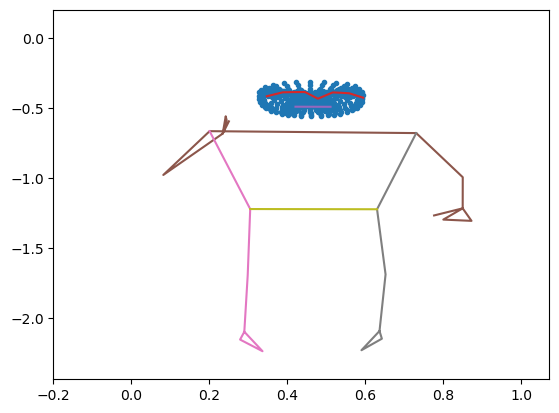

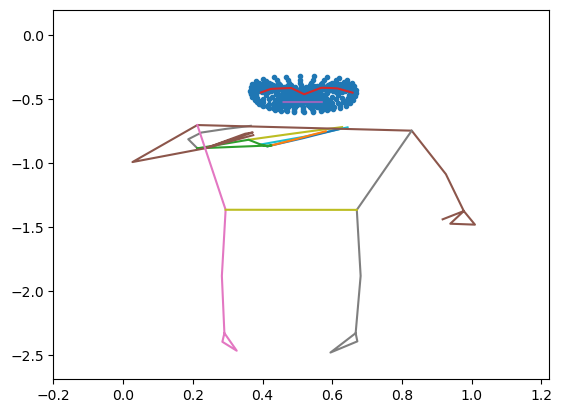

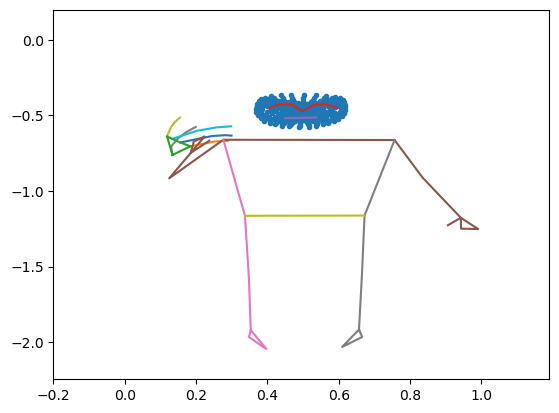

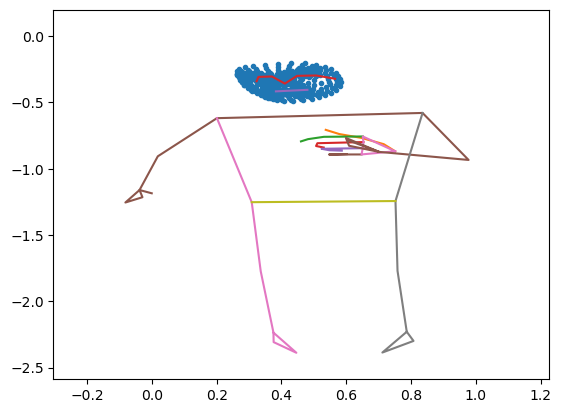

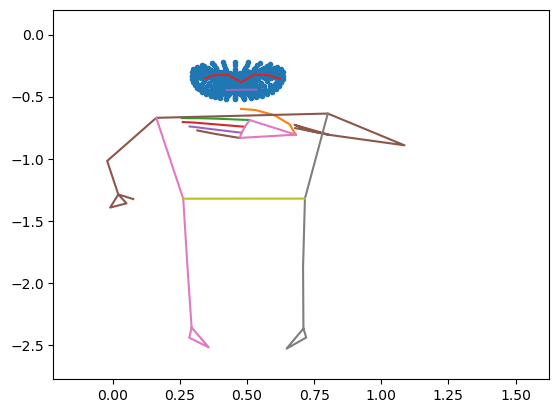

In [68]:
subset = df_train[df_train.sign == sign_name]

animations = []
for path_to_sign in subset.sample(5)['path'].values:
# for path_to_sign in subset.iloc[:5]['path'].values:
    print(path_to_sign)
    data = load_relevant_data_subset(f'{dir}/{path_to_sign}')
    data[:,:,1] *= -1 # flip over
    print(f'{data.shape=}')
    print(f"The sign being shown here is: {train[train.path==f'{path_to_sign}'].sign.values[0]}")

    data = first_and_2_disparate_key_frame(data)
    
    ## These values set the limits on the graph to stabilize the video
    xmin = np.nanmin(data[:,:,0]) - 0.2
    xmax = np.nanmax(data[:,:,0]) + 0.2
    ymin = np.nanmin(data[:,:,1]) - 0.2
    ymax = np.nanmax(data[:,:,1]) + 0.2

    fig, ax = plt.subplots()
    l, = ax.plot([], [])
    animation = FuncAnimation(fig, func=animation_frame, frames=list(range(data.shape[0])))
    display(HTML(animation.to_html5_video()))

print('Done')

In [69]:
# MAX_FRAMES = 3 # Will reduce to these number of frames (with 'nearest' method)
# sign_name = np.random.choice(df_train.sign.unique())
# subset = df_train[df_train.sign == sign_name]

# animations = []
# for path_to_sign in subset.sample(20)['path'].values:
# # for path_to_sign in subset.iloc[:5]['path'].values:
#     print(path_to_sign)
#     data = load_relevant_data_subset(f'{dir}/{path_to_sign}')
#     data[:,:,1] *= -1 # flip over
#     print(f'{data.shape=}')
#     print(f"The sign being shown here is: {train[train.path==f'{path_to_sign}'].sign.values[0]}")

#     data = tf.image.resize(data, (MAX_FRAMES,543), method='nearest')
#     ## These values set the limits on the graph to stabilize the video
#     xmin = np.nanmin(data[:,:,0]) - 0.2
#     xmax = np.nanmax(data[:,:,0]) + 0.2
#     ymin = np.nanmin(data[:,:,1]) - 0.2
#     ymax = np.nanmax(data[:,:,1]) + 0.2

#     fig, ax = plt.subplots()
#     l, = ax.plot([], [])
#     animation = FuncAnimation(fig, func=animation_frame, frames=list(range(data.shape[0])))
#     display(HTML(animation.to_html5_video()))

# print('Done')

In [2]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tqdm import tqdm
import json
import gc
from sklearn.model_selection import train_test_split
# import missingno as msno
import multiprocessing as mp

from pathlib import Path
import datetime

2023-03-05 23:50:07.408950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 23:50:07.546645: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-05 23:50:07.992508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/maxpow/miniconda3/envs/tf/lib/:/home/maxpow/miniconda3/envs/tf/lib/
2023-03-05 23:50:07.992573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_pl

In [16]:
face_x = np.zeros((3,468,2))
left_x = np.zeros((3,21,2))
xs = []
xs.append(np.mean(face_x, axis=0))
xs.append(np.mean(left_x,0))

In [19]:
# xfeat = 482 * 2 + 21 * 2
# xfeat = 

In [20]:
xs[0].shape

(468, 2)